In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from numpy.random import normal
from scipy.stats import chi2
%matplotlib inline

In [2]:
N_train, N_test = 2000, 10000
X_train = normal(size=(N_train, 10))
X_test = normal(size=(N_test, 10))

In [3]:
Y_train = np.sum(X_train ** 2, axis=1) < chi2.ppf(0.5, 10)
Y_test = np.sum(X_test ** 2, axis=1) < chi2.ppf(0.5, 10)

In [17]:
single_stump = tree.DecisionTreeClassifier(max_leaf_nodes=2)
single_stump.fit(X_train, Y_train)
single_stump_Y_test_hat = single_stump.predict(X_test)
single_stump_err = 1-accuracy_score(single_stump_Y_test_hat, Y_test)
print('Signle Stump Test Error ', single_stump_err)

Signle Stump Test Error  0.46719999999999995


In [19]:
_244_node_tree = tree.DecisionTreeClassifier(max_leaf_nodes=244)
_244_node_tree.fit(X_train, Y_train)
_244_node_tree_Y_test_hat = _244_node_tree.predict(X_test)
_244_node_tree_err = 1-accuracy_score(_244_node_tree_Y_test_hat, Y_test)
print('244 Node Tree Test Error ', _244_node_tree_err)

244 Node Tree Test Error  0.2509


In [6]:
G, alpha, M = [], [], 800
w = np.array([1.0/N_train]*N_train)

In [7]:
for i in range(M):
    dtc = tree.DecisionTreeClassifier(max_leaf_nodes=2)
    dtc.fit(X_train, Y_train, sample_weight=w)
    Y_train_hat = dtc.predict(X_train)
    err = np.sum((Y_train_hat != Y_train) * w) / np.sum(w)
    alpha_i = np.log((1-err)/err)
    w = w*np.exp(alpha_i*(Y_train_hat != Y_train))
    G.append(dtc)
    alpha.append(alpha_i)

In [8]:
boosting_iterations_err = []
Y_test_hat = np.zeros(N_test)
for i in range(M):
    tmp = 0+G[i].predict(X_test)
    tmp[tmp == 0] = -1
    Y_test_hat += alpha[i]*tmp    
    boosting_iterations_err.append(1-accuracy_score(np.sign(Y_test_hat) == 1, Y_test))

In [9]:
print('Boosting Test Error ', boosting_iterations_err[-1])

Boosting Test Error  0.09930000000000005


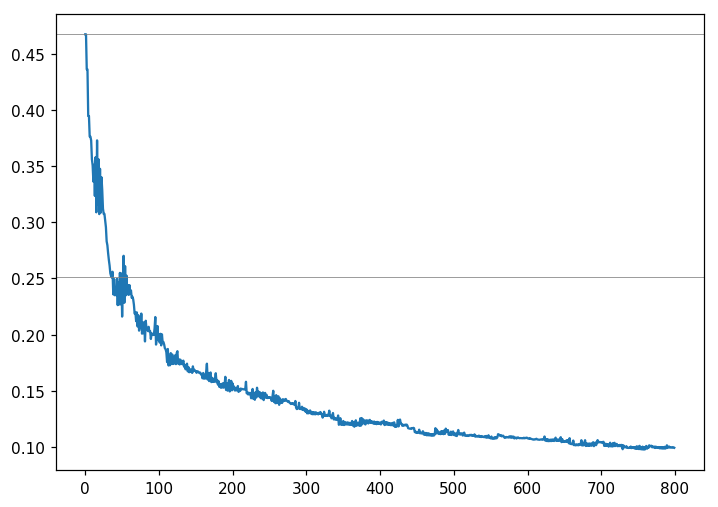

In [20]:
fig, ax1 = plt.subplots(figsize=(7.6, 5.5), dpi=110)
ax1.plot(range(M), boosting_iterations_err)
ax1.axhline(single_stump_err, color='gray', linewidth=0.5)
ax1.axhline(_244_node_tree_err, color='gray', linewidth=0.5)